In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error

In [3]:
sd = pd.read_csv("Database/Salary_Data.csv")

In [4]:
sd

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Hxze.-\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

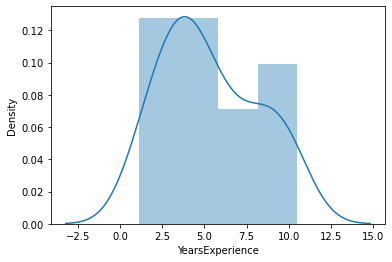

In [6]:
sns.distplot(sd['YearsExperience'])

C:\Users\Hxze.-\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

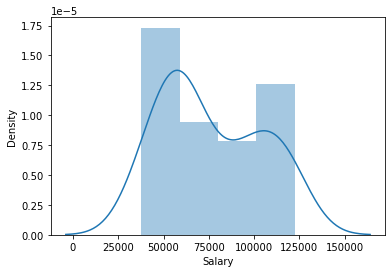

In [7]:
sns.distplot(sd['Salary'])

In [8]:
sd[sd.duplicated()].shape

(0, 2)

In [9]:
sd[sd.duplicated()]

,YearsExperience,Salary


In [10]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


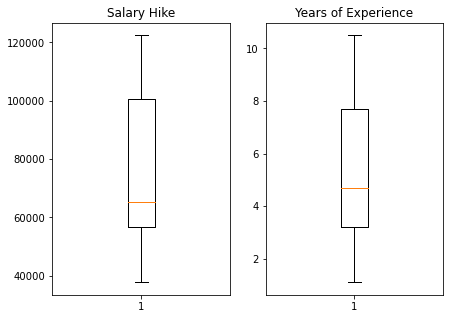

In [11]:
plt.subplots(figsize = (7,5))
plt.subplot(1,2,1)
plt.boxplot(sd['Salary'])
plt.title('Salary Hike')
plt.subplot(1,2,2)
plt.boxplot(sd['YearsExperience'])
plt.title('Years of Experience')
plt.show()

In [12]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

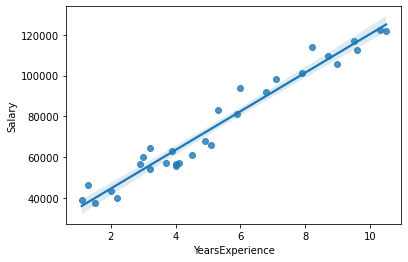

In [13]:
sns.regplot(x=sd['YearsExperience'],y=sd['Salary'])

In [14]:
model = sm.ols('Salary~YearsExperience', data = sd).fit()

In [15]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [16]:
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [12]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [18]:
square_root_model = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = sd).fit()

In [19]:
square_root_model.params

Intercept                   103.568031
np.sqrt(YearsExperience)     75.626932
dtype: float64

In [20]:
square_root_model.tvalues , square_root_model.pvalues

(Intercept                   12.663496
 np.sqrt(YearsExperience)    21.315126
 dtype: float64,
 Intercept                   4.141645e-13
 np.sqrt(YearsExperience)    7.584326e-19
 dtype: float64)

In [16]:
square_root_model.rsquared,square_root_model.rsquared_adj

(0.9419490138976825, 0.9398757643940283)

In [21]:
cube_root_model = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = sd).fit()

In [22]:
cube_root_model.params

Intercept                   16.660277
np.cbrt(YearsExperience)    14.896252
dtype: float64

In [23]:
cube_root_model.tvalues , cube_root_model.pvalues

(Intercept                   12.811402
 np.cbrt(YearsExperience)    19.658772
 dtype: float64,
 Intercept                   3.133760e-13
 np.cbrt(YearsExperience)    6.367642e-18
 dtype: float64)

In [19]:
cube_root_model.rsquared,cube_root_model.rsquared_adj

(0.9324434036761006, 0.9300306680931042)

In [24]:
log_model = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = sd).fit()

In [25]:
log_model.params

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64

In [26]:
log_model.tvalues , log_model.pvalues

(Intercept                  184.867959
 np.log(YearsExperience)     16.352542
 dtype: float64,
 Intercept                  9.073132e-45
 np.log(YearsExperience)    7.395278e-16
 dtype: float64)

In [27]:
log_model.rsquared,log_model.rsquared_adj

(0.905215072581715, 0.9018298966024905)

In [28]:
square_root_pred_y =np.square(square_root_model.predict(sd['YearsExperience']))
cube_root_pred_y =pow(cube_root_model.predict(sd['YearsExperience']),3)
log_model_pred_y =np.exp(log_model.predict(sd['YearsExperience']))

In [29]:
square_root_rmse =np.sqrt(mean_squared_error(sd['Salary'], square_root_pred_y))
cube_root_rmse =np.sqrt(mean_squared_error(sd['Salary'], cube_root_pred_y))
log__rmse =np.sqrt(mean_squared_error(sd['Salary'], log_model_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'square_root_model=', square_root_rmse,'\n' 'cube_root_model=', cube_root_rmse,'\n' 'log_model=', log__rmse)

model= 5788.315051119394 
square_root_model= 5960.647096174305 
cube_root_model= 6232.815455835858 
log_model= 7219.716974372787


In [30]:
data = {'model': np.sqrt(model.mse_resid), 'square_root_model': square_root_rmse, 'cube_root_model': cube_root_rmse, 'log_model' : log__rmse}
min(data, key=data.get)

'model'

Selecting model as it has the most favourable scores

In [27]:
predicted = pd.DataFrame()
predicted['YearsExperience'] = sd.YearsExperience
predicted['Salary'] = sd.Salary
predicted['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted.YearsExperience))
predicted

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
